<h1 align=center><font color=red>Battle of Neighborhoods </font><h1>

# 1. Description of the Problem and Discussion of the Background 

## Introduction Section

This final project explores the best locations for African restaurants throughout the Bronx of New York. New York is the most populous city in the United States with more than 8.4 million (Quick Facts, 2018) people. Over 3 million of New York City’s residents are foreign-born; over one-quarter arrived in 2000 or later. They came from many parts of the world.The Black nonhispanic population of New York City numbered 1.89 million in 2014, more than double the count in any other U.S. city  
At the 2010 U.S. Census, there were 1,385,108 people residing in Bronx, an increase of 3.9% since 2000. The U.S. Census considers the Bronx to be the most diverse area in the country. There is an 89.7 percent chance that any two residents, chosen at random, would be of different race or ethnicity.
With it's diverse culture , comes diverse food items. There are many resturants in bronx, each belonging to different categories like Chinese , Indian , French etc.
According to a 2013 Census Bureau estimate, 45.8% of the Bronx's population was white, 43.3% was black or African American, 4.2% Asian, 3.0% American Indian, 0.4% Pacific Islander, and 3.3% of two or more races. In addition, 54.6% of the population was of Hispanic or Latino origin, of any race. 

So, as a part of this project we will find the best place for open a new African Restaurant in Bronx of New York City.

## Problem Statement

1. What are the best location for African restaurant in Bronx, New York City.
2. In what Neighborhood should I open an African restaurant to have the best chance of the business being successful?

## Target Audience

* Business personnel who wants to invest or open a restaurant.
* Finding the best location for opening a restaurant.
 

#  2. Data Section

For this project we need the following data:
1. New York City data that contains Borough, Neighborhoods along with there latitudes and longitudes
    * Data Source: https://cocl.us/new_york_dataset
    * Description : This data set contains the required information. And we will use this data set to explore        various neighborhoods of new york city. 
 
2. African resturants in Bronx neighborhood of new york city.
    * Data Source: Foursquare API
    * Description : By using this API we will get all the venues in Bronx neighborhood. We can filter these venues to get only African resturants. 

## Approach

* Collect the new york city data from https://cocl.us/new_york_dataset
* Using Foursquare API we will get all venues for each neighborhood.
* Filter out all venues which are African Restaurants.
* Data Visualization and some statistical analysis.
* Analysing using Clustering (Specially K-Means):
    1. Find the best value of K 
    2. Visualize the neighborhood with number of African Restaurants.
* Compare the Neighborhoods to Find the Best Place for Starting up a Restaurant
* Inference From these Results and related Conclusions

## Import all requireda libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if folium is not installed
import folium # map rendering library

!conda install -c conda-forge geopy --yes # uncomment this line if this library is not installed.

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

# 3. Exploratory Data Analysis 

### We will get Newyork data such as Borough, Neighorhood along with latitude and longitude.

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
    
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
ny_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
newyork = pd.DataFrame(columns=column_names)

### let's loop through the data and fill the dataframe one row at a time.

In [3]:
# Get the Newyork data
for data in ny_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    newyork = newyork.append({'Borough': borough,
                                'Neighborhood': neighborhood_name,
                                'Latitude': neighborhood_lat,
                                'Longitude': neighborhood_lon}, ignore_index=True)

In [4]:
# Print Newyork data
print(newyork.shape)
newyork.head()

(306, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


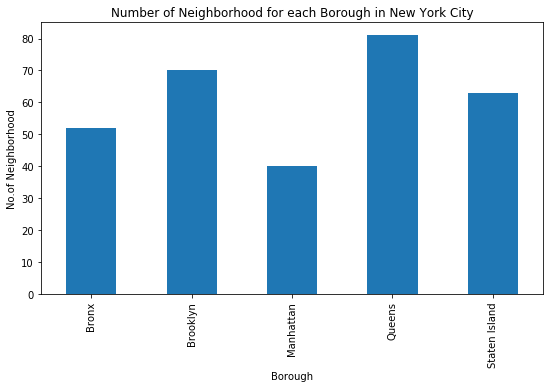

In [5]:
plt.figure(figsize=(9,5))
newyork.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize=10)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=10)
# Display the plot
plt.show()

#### Here we will use Bronx since it is considered to be the most diverse area in Newyork city.

### Define Foursquare Credentials and Version

In [6]:
CLIENT_ID = 'KAKPUDN2B412CBRLBWZS3MIOS1OUZEFHSOWAQ21L0SMXEBRU' # your Foursquare ID
CLIENT_SECRET = 'M3ZSYMO20DH4N15MMBCTEEXSDJPQE2ZXVU30D0HTEJ4NUZCG' # your Foursquare Secret
VERSION = '20190604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KAKPUDN2B412CBRLBWZS3MIOS1OUZEFHSOWAQ21L0SMXEBRU
CLIENT_SECRET:M3ZSYMO20DH4N15MMBCTEEXSDJPQE2ZXVU30D0HTEJ4NUZCG


### We will use geocoder for coordinates of Bronx

In [7]:
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.8466508, -73.8785937.


### Get data of Bronx

In [8]:
bronx_data = newyork[newyork['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


###  we define a function for get near by venues of all neighborhoods

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    LIMIT=100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
bronx_venues = getNearbyVenues(names=bronx_data['Neighborhood'],
                                   latitudes=bronx_data['Latitude'],
                                   longitudes=bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [13]:
print(bronx_venues.shape)
bronx_venues.head()

(1222, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [14]:
bronx_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,33,33,33,33,33,33
Baychester,18,18,18,18,18,18
Bedford Park,34,34,34,34,34,34
Belmont,100,100,100,100,100,100
Bronxdale,13,13,13,13,13,13
Castle Hill,9,9,9,9,9,9
City Island,26,26,26,26,26,26
Claremont Village,17,17,17,17,17,17
Clason Point,9,9,9,9,9,9


In [15]:
#Number of unique venue categories
print('There are {} uniques categories.'.format(len(bronx_venues['Venue Category'].unique())))

There are 168 uniques categories.


In [16]:
# check if the results contain "African Restaurants"
"African Restaurant" in bronx_venues['Venue Category'].unique()

True

### We will do hot encoding for getting dummies

In [17]:
# one hot encoding
to_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 
to_onehot.set_index('Neighborhood', inplace=True)

In [18]:
to_onehot.reset_index(inplace=True)

In [19]:
to_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Venue,Nail Salon,Nightclub,Optical Shop,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Rental Car Location,Restaurant,River,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Weight Loss Center,Wings Joint,Women's Store
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [20]:
to_onehot.shape

(1222, 169)

###  Let's Visualize aximum number of African restaurant

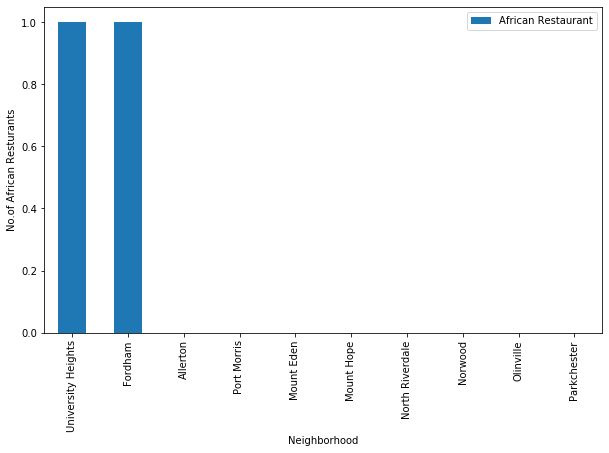

In [21]:
graph = pd.DataFrame(to_onehot.groupby('Neighborhood')['African Restaurant'].sum())
graph = graph.sort_values(by='African Restaurant', ascending=False)
graph.iloc[:10].plot(kind='bar', figsize=(10,6))
plt.xlabel('Neighborhood')
plt.ylabel('No.of African Resturants')
plt.show()

### Here we see that *University Heights* and *Fordham* have the maximum number of African restaurants

In [22]:
bronx_grouped = to_onehot.groupby('Neighborhood').mean().reset_index()
print(bronx_grouped.shape)
bronx_grouped.head()

(52, 169)


,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Venue,Nail Salon,Nightclub,Optical Shop,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Rental Car Location,Restaurant,River,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Weight Loss Center,Wings Joint,Women's Store
0,Allerton,0.0,0.0,0.030303,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060606,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.030303,0.0,0.0,0.0,0.000000,0.0,0.030303,0.0,0.00,0.0,0.0,0.030303,0.00,0.060606,0.0,0.00,0.0,0.0,0.0,0.000000,0.060606,0.0,0.0,0.060606,0.030303,0.030303,0.000000,0.030303,0.0,0.0,0.030303,0.000000,0.000000,0.0,0.0,0.030303,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.030303,0.0,0.0,0.0,0.030303,0.00,0.0,0.030303,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.030303,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.030303,0.000000,0.000000,0.0,0.030303,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.030303,0.00,0.151515,0.0,0.030303,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.030303,0.0,0.0,0.0,0.0,0.060606,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,Baychester,0.0,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.055556,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.111111,0.000000,0.055556,0.0,0.0,0.055556,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.055556,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.055556,0.055556,0.0,0.055556,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000

In [23]:
len(bronx_grouped[bronx_grouped["African Restaurant"] > 0])

2

In [24]:
african_rest = bronx_grouped[['Neighborhood','African Restaurant']]
print(african_rest.shape)
african_rest.head()

(52, 2)


,Neighborhood,African Restaurant
0,Allerton,0.0
1,Baychester,0.0
2,Bedford Park,0.0
3,Belmont,0.0
4,Bronxdale,0.0


In [25]:
bronx_grouped_clustering = african_rest.drop('Neighborhood', 1)

## Graph for getting best value of *K* for K-Means

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/e

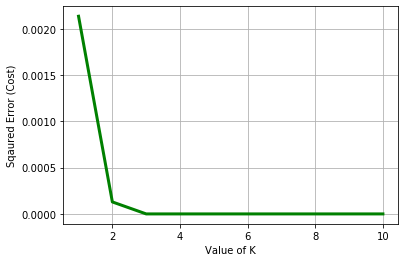

In [26]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(bronx_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.grid()
plt.show() # clear the plot 

#### According to the graph the best value of K is 3

# 4. Clustering

In [27]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [28]:
# add clustering labels
african_rest["Cluster Labels"] = kmeans.labels_
african_rest.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,African Restaurant,Cluster Labels
0,Allerton,0.0,0
1,Baychester,0.0,0
2,Bedford Park,0.0,0
3,Belmont,0.0,0
4,Bronxdale,0.0,0


In [29]:
# merge african_rest with bronx_data to add latitude/longitude for each neighborhood
african_rest = african_rest.join(bronx_data.set_index("Neighborhood"), on="Neighborhood")
print(african_rest.shape)
african_rest.head()

(52, 6)


,Neighborhood,African Restaurant,Cluster Labels,Borough,Latitude,Longitude
0,Allerton,0.0,0,Bronx,40.865788,-73.859319
1,Baychester,0.0,0,Bronx,40.866858,-73.835798
2,Bedford Park,0.0,0,Bronx,40.870185,-73.885512
3,Belmont,0.0,0,Bronx,40.857277,-73.888452
4,Bronxdale,0.0,0,Bronx,40.852723,-73.861726


In [30]:
african_restaurant = african_rest[['Neighborhood','African Restaurant','Cluster Labels','Latitude','Longitude']]
african_restaurant.head()

,Neighborhood,African Restaurant,Cluster Labels,Latitude,Longitude
0,Allerton,0.0,0,40.865788,-73.859319
1,Baychester,0.0,0,40.866858,-73.835798
2,Bedford Park,0.0,0,40.870185,-73.885512
3,Belmont,0.0,0,40.857277,-73.888452
4,Bronxdale,0.0,0,40.852723,-73.861726


In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(african_restaurant['Latitude'], african_restaurant['Longitude'], african_restaurant['Neighborhood'], african_restaurant['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [34]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

###  Let's Examine cluster

In [35]:
#Cluster 0
african_restaurant.loc[african_restaurant['Cluster Labels'] == 0]

,Neighborhood,African Restaurant,Cluster Labels,Latitude,Longitude
0,Allerton,0.0,0,40.865788,-73.859319
1,Baychester,0.0,0,40.866858,-73.835798
2,Bedford Park,0.0,0,40.870185,-73.885512
3,Belmont,0.0,0,40.857277,-73.888452
4,Bronxdale,0.0,0,40.852723,-73.861726
5,Castle Hill,0.0,0,40.819014,-73.848027
6,City Island,0.0,0,40.847247,-73.786488
7,Claremont Village,0.0,0,40.831428,-73.901199
8,Clason Point,0.0,0,40.806551,-73.854144
9,Co-op City,0.0,0,40.874294,-73.829939


In [36]:
#Cluster 1
african_restaurant.loc[african_restaurant['Cluster Labels'] == 1]

,Neighborhood,African Restaurant,Cluster Labels,Latitude,Longitude
45,University Heights,0.045455,1,40.855727,-73.910416


In [37]:
#Cluster 2
african_restaurant.loc[african_restaurant['Cluster Labels'] == 2]

,Neighborhood,African Restaurant,Cluster Labels,Latitude,Longitude
18,Fordham,0.011494,2,40.860997,-73.896427
